<a href="https://colab.research.google.com/github/Hitaishree1/Hitaishree1/blob/main/CSGo_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dt=pd.read_csv('/content/csgo_round_snapshots (4).csv')

In [ ]:
dt.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [ ]:
dt['round_winner'].value_counts()

T     62406
CT    60004
Name: round_winner, dtype: int64

In [ ]:
dt.shape

(122410, 97)

In [ ]:
dt['map'].value_counts()

de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: map, dtype: int64

In [ ]:
counts=dt['map'].value_counts()
counts

de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: map, dtype: int64

In [ ]:
total=counts.sum()

In [ ]:
total

122410

In [ ]:
percentage=counts/total*100

In [ ]:
percentage

de_inferno     19.451842
de_dust2       18.090025
de_nuke        15.542031
de_mirage      15.175231
de_overpass    11.503145
de_train       11.021158
de_vertigo      9.098113
de_cache        0.118454
Name: map, dtype: float64

In [ ]:
for map_name,count, percentage in zip(counts.index , counts.values ,percentage.values):
  print(f'{map_name}:{percentage}%','/',count)

de_inferno:19.45184216975737% / 23811
de_dust2:18.090025324728373% / 22144
de_nuke:15.54203087983008% / 19025
de_mirage:15.175230781798874% / 18576
de_overpass:11.503145167878442% / 14081
de_train:11.021158402091332% / 13491
de_vertigo:9.098112899272936% / 11137
de_cache:0.11845437464259455% / 145


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dt['map']=le.fit_transform(dt['map'])
dt['bomb_planted']=le.fit_transform(dt['bomb_planted'])
dt['round_winner']=le.fit_transform(dt['round_winner'])

Text(0, 0.5, 'count')

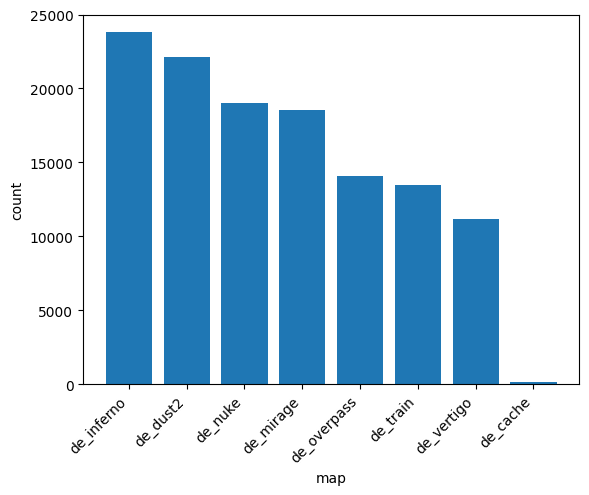

In [ ]:
plt.bar(counts.index, counts.values)
plt.xticks(rotation=45 ,ha='right')
plt.xlabel('map')
plt.ylabel('count')

In [ ]:
import plotly.express as px

counts= dt['map'].value_counts()

data_plotly= pd.DataFrame({'map':counts.index, 'count': counts.values})

total= counts.sum()

data_plotly['percentage']=data_plotly['count']/total*100

data_plotly=data_plotly.sort_values(by='count',ascending=False)

fig=px.bar(data_plotly, x='map',y='count',text='percentage',
           labels={'count':'count','map':'map'},
           title='map counts',template='plotly_dark')
fig.update_traces(texttemplate='%{text:.2f}%' , textposition='outside')
fig.update_layout(xaxis=dict(tickangle=45,tickmode='array',tickvals=list(data_plotly['map'])))
fig.show()


In [ ]:
dt.head(5)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
X=dt.drop(columns=['round_winner'],axis=1)

In [ ]:
X

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,1.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0


In [ ]:
X=X.fillna(0)

In [ ]:
Y=dt[['round_winner']]

In [ ]:
Y

,round_winner
0,0
1,0
2,0
3,0
4,0
...,...
122405,1
122406,1
122407,1
122408,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [ ]:
x_train.shape

(97928, 96)

In [ ]:
x_test.shape

(24482, 96)

In [ ]:
y_train.shape

(97928, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda=LinearDiscriminantAnalysis()

In [ ]:
lda.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LinearDiscriminantAnalysis()

In [ ]:
lda.transform(x_test)

array([[-0.26134593],
       [-0.26206561],
       [ 0.05503114],
       ...,
       [ 0.26337402],
       [-0.06069855],
       [-0.08911199]])

In [ ]:
lda_coefficients=np.exp(np.abs(lda.coef_))

In [ ]:
lda_coefficients=lda_coefficients.flatten()    #flatten to convert multidimensional to one dimensional

In [ ]:
lda_coefficients

array([1.15203101, 1.01467641, 1.00919666, 1.085611  , 1.2755765 ,
       1.54654561, 1.39474356, 1.69653302, 1.70115434, 1.21672643,
       1.16373863, 1.02770584, 1.19696558, 1.02981347, 1.20365792,
       1.21383038, 1.21835987, 1.80962628, 1.23880533, 1.03456478,
       1.36652962, 1.26904057, 1.        , 1.00285211, 1.00594476,
       1.05126994, 1.01307014, 1.01944649, 1.15741627, 1.04299308,
       1.        , 1.02527484, 1.05948955, 1.13194278, 1.02696543,
       1.06471747, 1.        , 1.        , 1.10791021, 1.04586397,
       1.62775135, 1.1059707 , 1.00367808, 1.10366565, 1.02150529,
       1.00806433, 1.01422153, 1.03495442, 1.00043325, 1.00714003,
       1.12680673, 1.03484039, 1.        , 1.00757594, 1.01946437,
       1.01588905, 1.01916074, 1.01840322, 1.        , 1.0061282 ,
       1.        , 1.01663584, 1.00864667, 1.01188788, 1.25230648,
       1.71061093, 1.09048535, 1.01761423, 1.0580391 , 1.09007199,
       1.02304867, 1.00403512, 1.00193218, 1.10878662, 1.02549

In [ ]:
num_fea=X.shape[1]

In [ ]:
num_fea

96

In [ ]:
fea_indices=np.arange(num_fea)

In [ ]:
fea_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [ ]:
fea_name=list(X.columns)

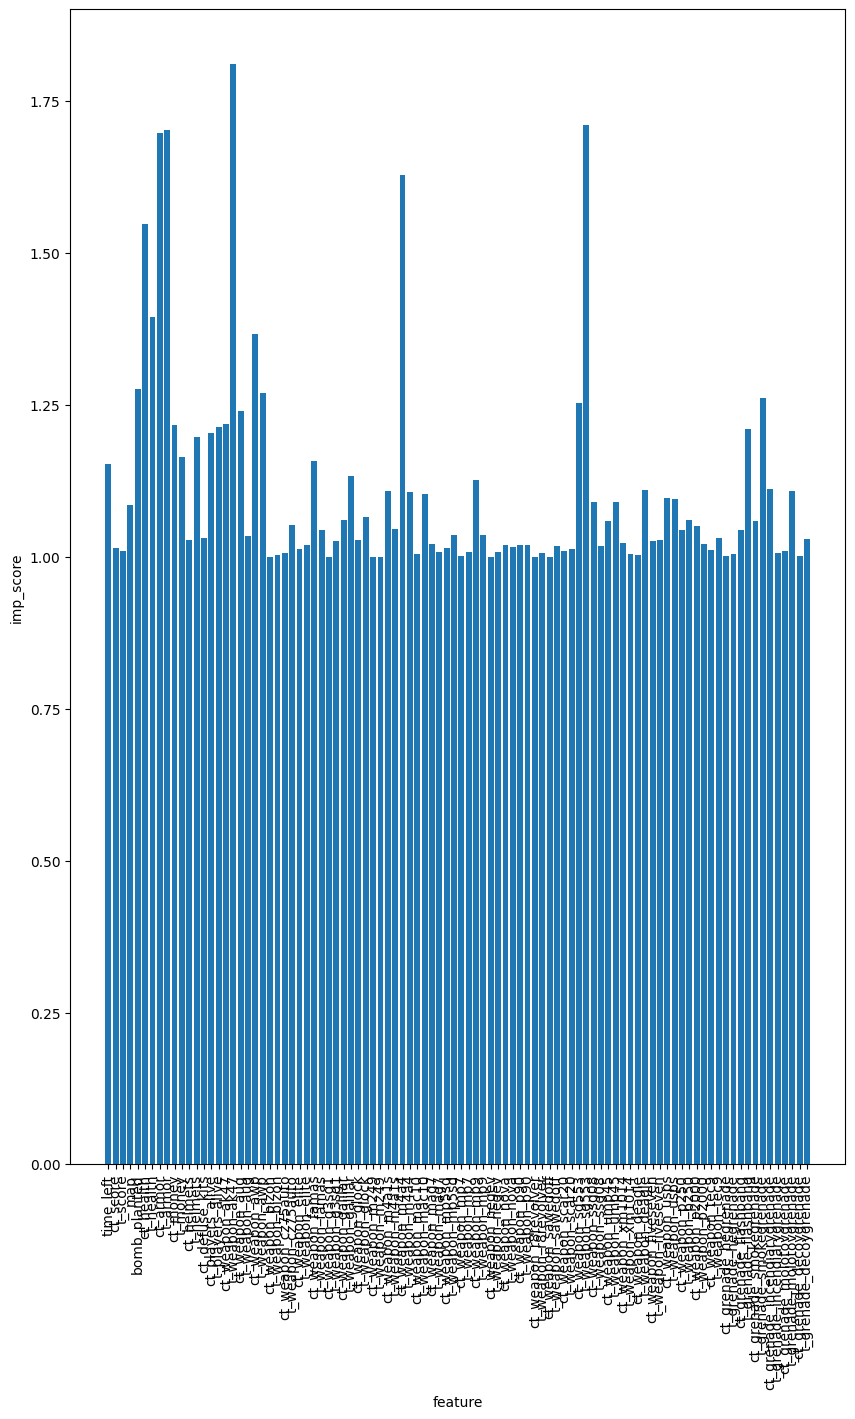

In [ ]:
plt.figure(figsize=(10,15))
plt.bar(fea_indices,lda_coefficients)
plt.xticks(fea_indices,fea_name,rotation='vertical')
plt.xlabel('feature')
plt.ylabel('imp_score')
plt.show()

In [ ]:
df_feascore=pd.DataFrame({'fea_name':fea_name,"fea_score":lda_coefficients})

In [ ]:
top_20=df_feascore.nlargest(20,'fea_score')

In [ ]:
top_20.head(5)

,fea_name,fea_score
17,t_weapon_ak47,1.809626
65,t_weapon_sg553,1.710611
8,t_armor,1.701154
7,ct_armor,1.696533
40,ct_weapon_m4a4,1.627751


In [ ]:
top_20.index

Int64Index([17, 65, 8, 7, 40, 5, 6, 20, 4, 21, 89, 64, 18, 16, 9, 15, 87, 14,
            12, 10],
           dtype='int64')

In [ ]:
x_train=x_train[:,[76, 14, 35, 8, 72, 78, 15, 7, 73, 17, 65, 80, 24, 79, 40, 74, 77,
            5, 89, 25]]

In [ ]:
x_test=x_test[:,[76, 14, 35, 8, 72, 78, 15, 7, 73, 17, 65, 80, 24, 79, 40, 74, 77,
            5, 89, 25]]

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(y_test,y_pred)

0.7369087492851891

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73     11945
           1       0.75      0.74      0.74     12537

    accuracy                           0.74     24482
   macro avg       0.74      0.74      0.74     24482
weighted avg       0.74      0.74      0.74     24482



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7951556245404787

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79     11945
           1       0.80      0.79      0.80     12537

    accuracy                           0.80     24482
   macro avg       0.80      0.80      0.80     24482
weighted avg       0.80      0.80      0.80     24482



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

<ipython-input-124-20ccf139cd6c>:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
accuracy_score(y_pred,y_test)

0.8369822726901397

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     11945
           1       0.85      0.83      0.84     12537

    accuracy                           0.84     24482
   macro avg       0.84      0.84      0.84     24482
weighted avg       0.84      0.84      0.84     24482

